
**Clustering Analysis of Spotify**

Student ID: 05211940000099

Student Names: Dimas Arief Rahman

# Data Preparation

**Import Library** 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

**Import Data** 

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv')

In [ ]:
df.shape

(169909, 19)

Dataset memiliki 169909 baris dengan 19 variabel.

**Data Cleaning**

In [ ]:
df.isna().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

Dari hasil di atas ini dapat dilihat bahwa tidak ada *missing values*

In [ ]:
df.drop(['id', 'release_date'], axis=1, inplace=True)

In [ ]:
df.drop_duplicates(subset=['artists','name'],inplace = True)

**Hasil Data Cleaning**

In [ ]:
df.shape

(156608, 17)

In [ ]:
df

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,Ojos De Maniaco,"['LEGADO 7', 'Junior H']",218501,2020,0.2100,0.795,0.5850,0.000001,0.1120,-4.451,0.0374,97.479,0.9340,1,8,68,0
169904,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,How Would I Know,"['Kygo', 'Oh Wonder']",180700,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0


**Dataframe Cluster**

In [ ]:
clusters = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence', 'liveness']]
clusters.head()

,acousticness,danceability,energy,instrumentalness,speechiness,valence,liveness
0,0.995,0.708,0.1950,0.563,0.0506,0.7790,0.1510
1,0.994,0.379,0.0135,0.901,0.0462,0.0767,0.0763
2,0.604,0.749,0.2200,0.000,0.9290,0.8800,0.1190
3,0.995,0.781,0.1300,0.887,0.0926,0.7200,0.1110
4,0.990,0.210,0.2040,0.908,0.0424,0.0693,0.0980


# EDA

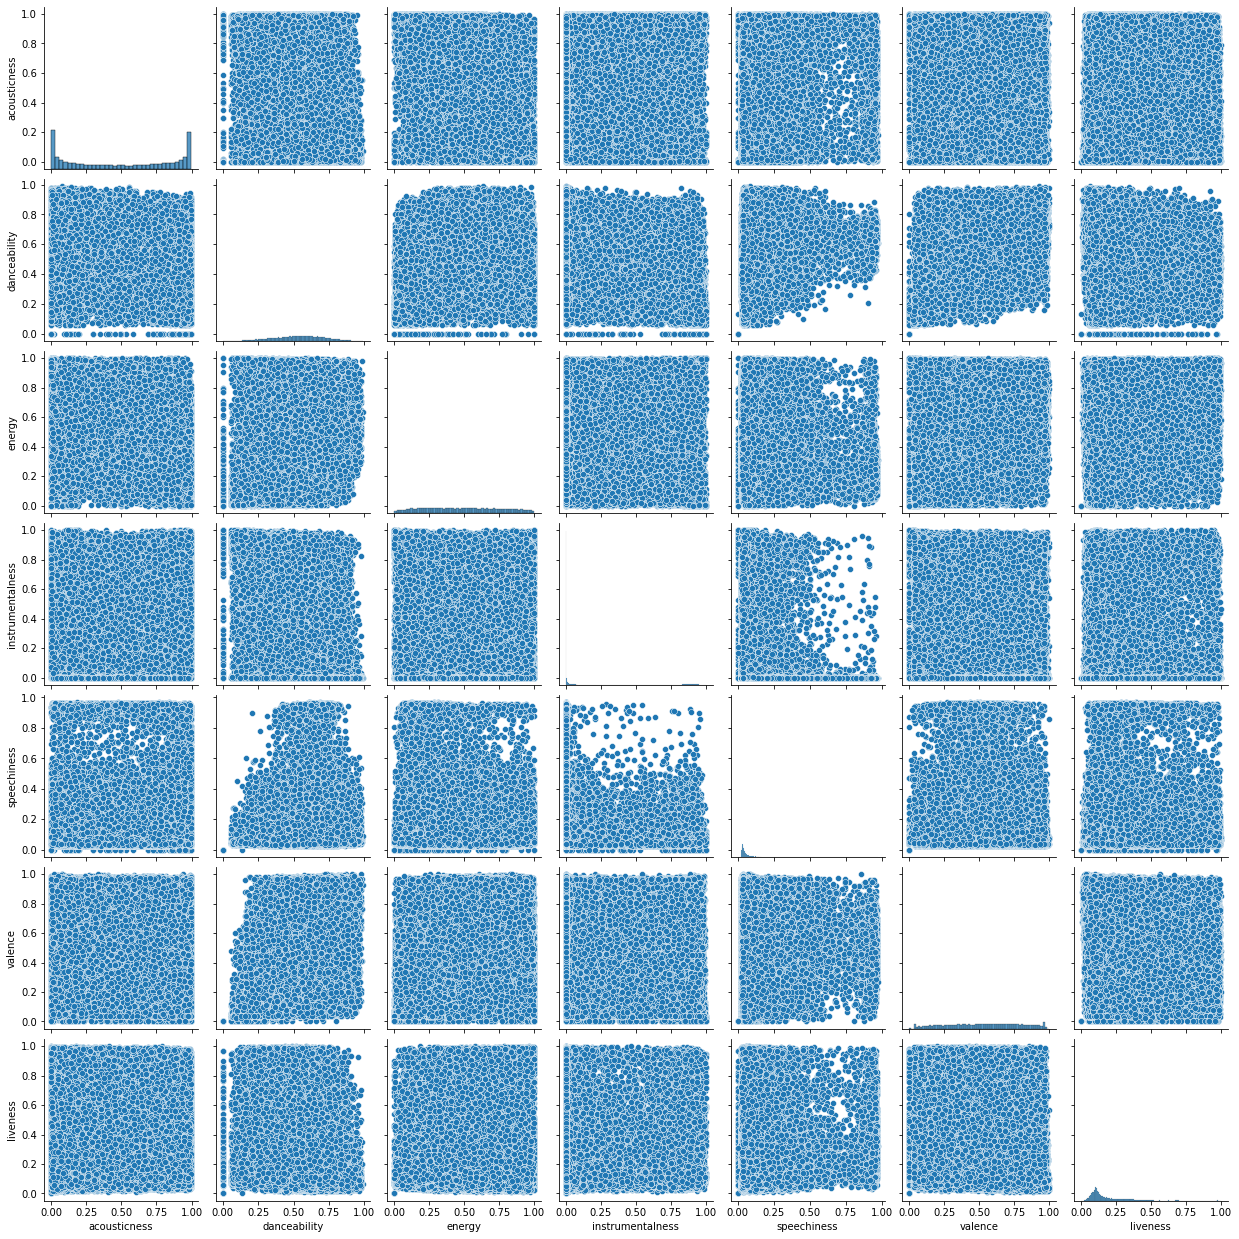

In [ ]:
sns.pairplot(clusters)

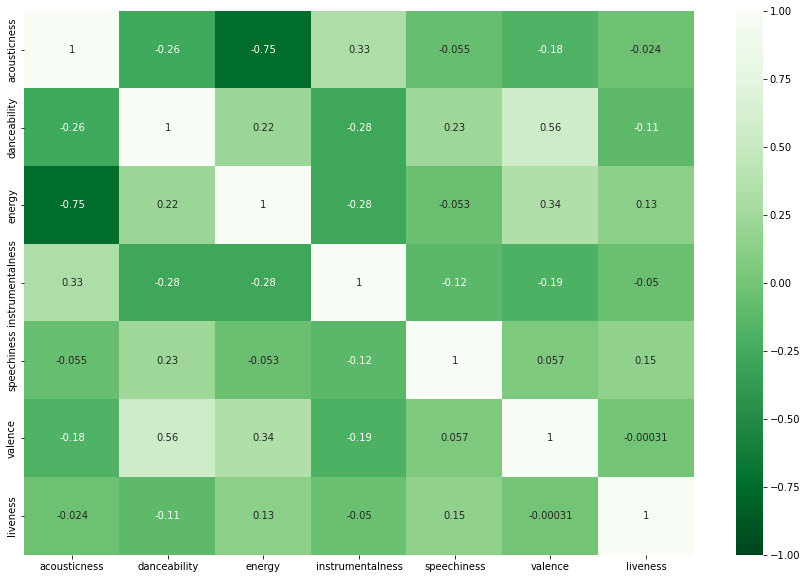

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(clusters.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens_r')

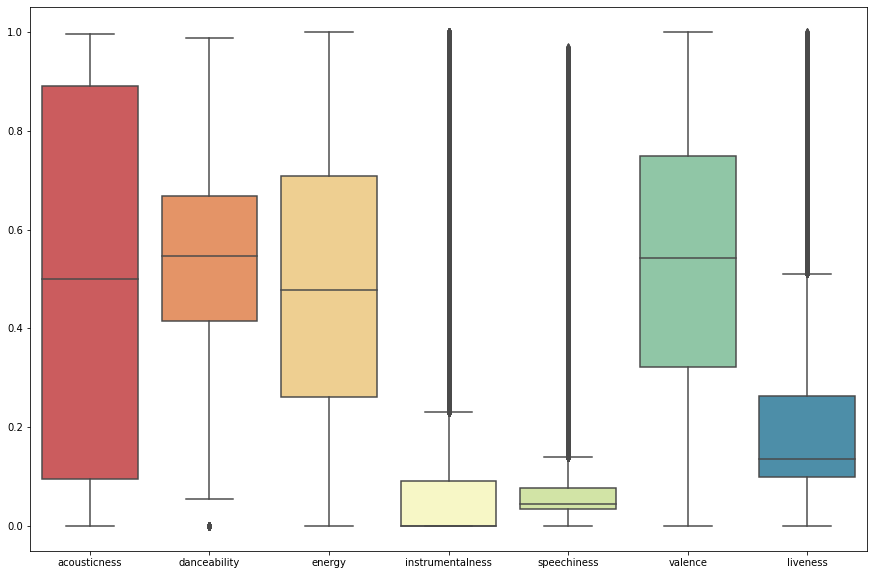

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=clusters, orient="v", palette='Spectral')
plt.show()

# K-Means

**Dimentionality Reduction**

In [ ]:
pca = decomposition.PCA()
pca.n_components = 2 
pca_df1 = pca.fit_transform(clusters) 
pca_df1

array([[ 0.57953742, -0.12176454],
       [ 1.00558578,  0.46930657],
       [ 0.01717561, -0.50188614],
       ...,
       [-0.31975541,  0.15368687],
       [ 0.03870246,  0.0399666 ],
       [-0.51026575,  0.11741434]])

In [ ]:
pca_df1.shape

(156608, 2)

**Elbow method**

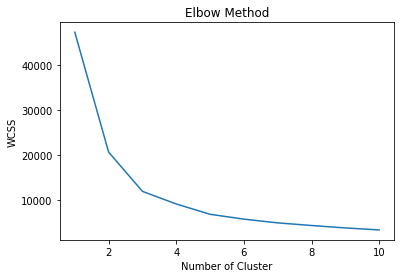

In [ ]:
WCSS = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42) 
    kmeans.fit(pca_df1) 
    WCSS.append(kmeans.inertia_) 
plt.plot(range(1,11),WCSS) 
plt.title('Elbow Method') 
plt.xlabel('Number of Cluster') 
plt.ylabel('WCSS') 
plt.show()

**K-Means Model**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(pca_df1)
y_kmeans

array([1, 2, 1, ..., 0, 1, 0], dtype=int32)

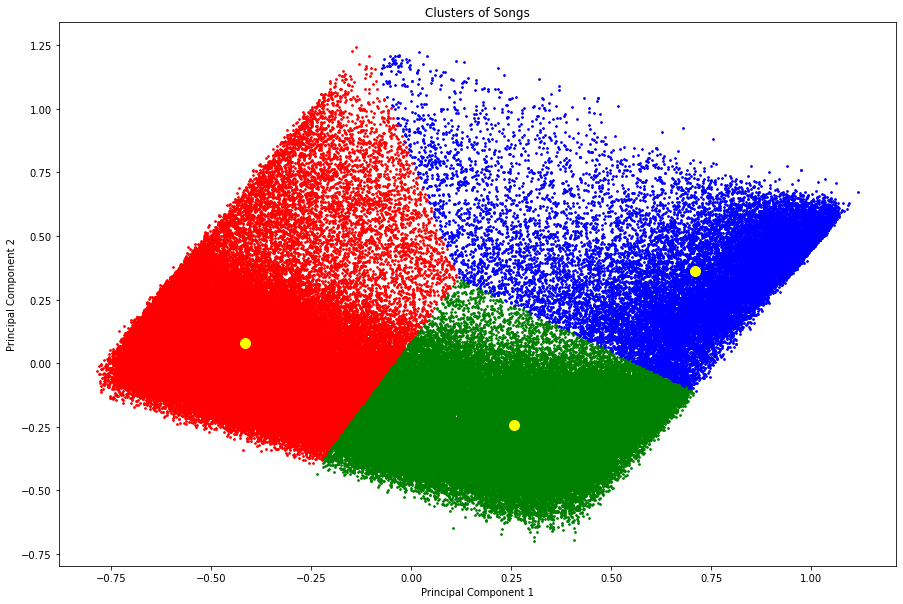

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(pca_df1[y_kmeans==0, 0], pca_df1[y_kmeans==0, 1], s=3, c='red', label ='Cluster 1')
plt.scatter(pca_df1[y_kmeans==1, 0], pca_df1[y_kmeans==1, 1], s=3, c='green', label ='Cluster 2')
plt.scatter(pca_df1[y_kmeans==2, 0], pca_df1[y_kmeans==2, 1], s=3, c='blue', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')

plt.title('Clusters of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Hasil Klasterisasi**

In [ ]:
df["cluster"] = y_kmeans
clustersfinal_df = df.groupby("cluster").agg("mean")
clustersfinal_df.insert(loc=0, column="count", value=df.groupby("cluster").size())
clustersfinal_df[["count", "acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence", "liveness"]]

,count,acousticness,danceability,energy,instrumentalness,speechiness,valence,liveness
cluster,,,,,,,,
0,75140,0.144963,0.587565,0.690425,0.065855,0.100383,0.591247,0.212151
1,58539,0.793627,0.528604,0.325255,0.040299,0.106638,0.521859,0.211754
2,22929,0.885031,0.395862,0.233907,0.795726,0.056636,0.356990,0.182749


**Akurasi Model**

In [ ]:
skor_kmeans = silhouette_score(pca_df1, y_kmeans)
skor_kmeans

0.516380197454149

# Heirarchichal Clustering

**Dataframe Heirarchichal Clustering**

Diambil 10.000 sampel acak dari dataset.

In [ ]:
clusters_sample = df.sample(n=10000, random_state = 42) 
clusters_hc = clusters_sample[['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'valence', 'liveness']] 
clusters_hc.head() 

,acousticness,danceability,energy,instrumentalness,speechiness,valence,liveness
79164,0.988,0.720,0.0897,0.2750,0.0449,0.5280,0.0989
5597,0.340,0.646,0.6430,0.0000,0.0670,0.6610,0.2520
68538,0.914,0.170,0.1740,0.0309,0.0358,0.0394,0.0635
161026,0.837,0.653,0.4060,0.5990,0.4960,0.2530,0.1950
29004,0.511,0.446,0.3660,0.0000,0.0287,0.7910,0.6040


**Dimentionality Reduction**

In [ ]:
pca1 = decomposition.PCA()
pca1.n_components = 2
pca_df2 = pca1.fit_transform(clusters_hc) 
pca_df2

array([[ 0.56908538, -0.23542463],
       [-0.30349345, -0.0979111 ],
       [ 0.59214314, -0.02517868],
       ...,
       [-0.33505602,  0.11561173],
       [ 0.13786629, -0.25414335],
       [ 0.00640385, -0.30617819]])

In [ ]:
pca_df2.shape

(10000, 2)

**Dendogram**

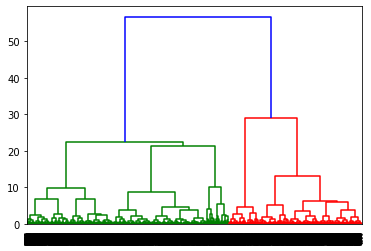

In [ ]:
dendro = linkage(pca_df2, method = 'ward', metric = 'euclidean')
dendrogram(dendro)
plt.show()

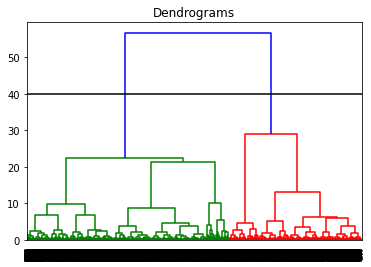

In [ ]:
max_d = 40

plt.figure()
plt.title('Dendrograms')
dendrogram(dendro)

plt.axhline(y = max_d, c='k')

**Heirarchichal Model**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean', linkage= 'average') 
y_pred = hc.fit_predict(pca_df2)

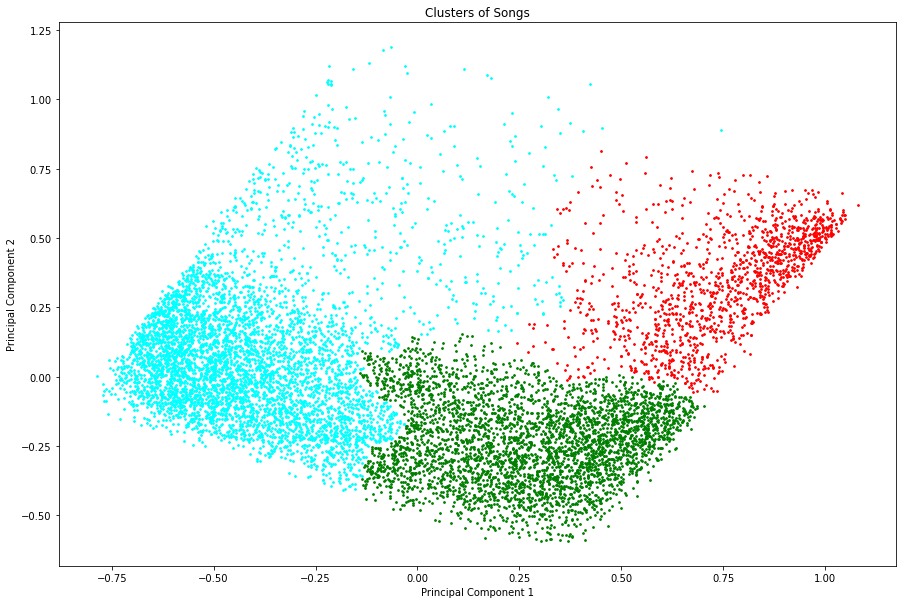

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(pca_df2[y_pred==0,0], pca_df2[y_pred==0,1], s=3, c='cyan', label = 'Cluster 1') 
plt.scatter(pca_df2[y_pred==1,0], pca_df2[y_pred==1,1], s=3, c='red', label = 'Cluster 2') 
plt.scatter(pca_df2[y_pred==2,0], pca_df2[y_pred==2,1], s=3, c='green', label = 'Cluster 3') 

plt.title('Clusters of Songs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Akurasi Model**

In [ ]:
skor_hc = silhouette_score(pca_df2, y_pred)
skor_hc

0.49136926586891533

# Performance

In [ ]:
performance = {'Silhouette_Score': [skor_kmeans, skor_hc]}
performance_df = pd.DataFrame(data = performance, index= ['K-Means Clustering', 'Heirarcichal Clustering'])
performance_df

,Silhouette_Score
K-Means Clustering,0.516380
Heirarcichal Clustering,0.491369
